In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
IrisData = pd.read_csv('iris.data', header=None)
IrisData.columns = ['Sepal Length','Sepal Width','Petal Length','Petal Width','Type']

In [4]:
listname = []
for i in range(len(IrisData['Type'])):
    if not(IrisData['Type'][i] in listname):
        listname.append(IrisData['Type'][i])

In [5]:
dicttypes = dict(zip(listname,[0,1,2]))
dicttypes

{'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}

In [6]:
categoria = []
for i in IrisData['Type']:
    categoria.append(dicttypes[i])

In [7]:
IrisData['Cate-type'] = categoria
IrisData

,Sepal Length,Sepal Width,Petal Length,Petal Width,Type,Cate-type
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2


In [8]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

In [9]:
x = IrisData[['Petal Length', 'Petal Width']]
y = IrisData['Cate-type']

In [10]:
x_treino, x_teste, y_treino, y_teste = train_test_split(x,y , test_size=0.3)

In [11]:
Model_kmeans = KMeans(n_clusters=3)
Mcluester  = Model_kmeans.fit(x_treino)

In [12]:
Mcluester.inertia_

20.6693722943723

In [13]:
Mcluester.labels_

array([0, 2, 2, 1, 0, 2, 0, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 2, 0, 2, 2, 2, 1, 1, 0, 1, 2, 0, 1, 1, 1, 2, 1, 1, 0, 2,
       1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 2, 1, 2, 2, 0, 2, 2, 1, 0,
       0, 2, 0, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 2, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

In [14]:
Mcluester.cluster_centers_

array([[1.46666667, 0.24285714],
       [4.21212121, 1.33636364],
       [5.56666667, 2.05      ]])

In [15]:
centerx = []
centery = []
for i in range(3):
    centerx.append(Mcluester.cluster_centers_[i][0])
    centery.append(Mcluester.cluster_centers_[i][1])

print(centerx)
print(centery)

[1.4666666666666663, 4.212121212121212, 5.566666666666666]
[0.24285714285714288, 1.3363636363636364, 2.05]


In [16]:
colores = {2:"Blue",0:"Orange",1:"green" }
color_names  = {'Iris-virginica':"Blue",'Iris-setosa':"Orange",'Iris-versicolor':"green" }
Array_Colors =[colores[x] for x in IrisData['Cate-type']]

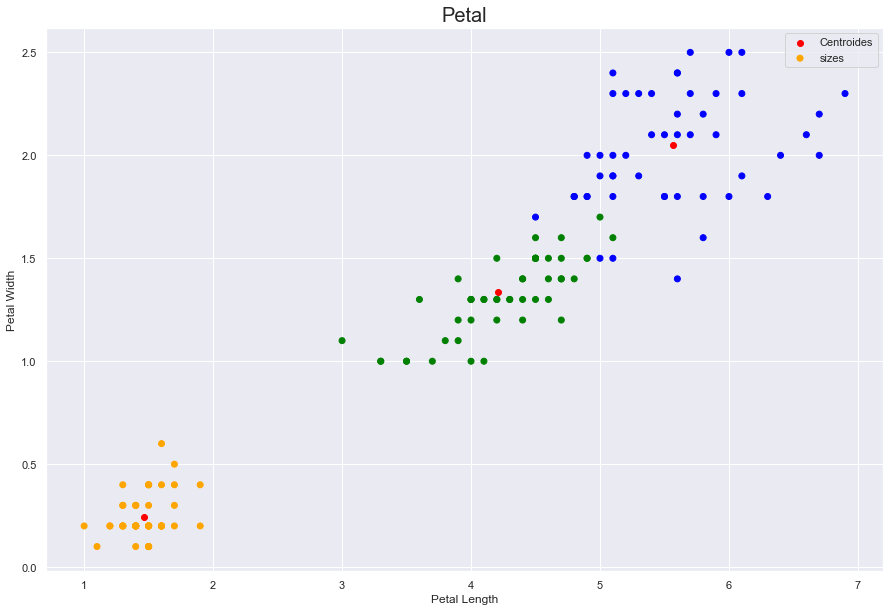

In [22]:
plt.figure(figsize=(15,10))
plt.scatter(centerx,centery, color='red', label='Centroides')
plt.scatter(IrisData['Petal Length'],IrisData['Petal Width'], color=Array_Colors,label="sizes")
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Petal', fontsize=20)
plt.legend()